In [6]:
%matplotlib inline

import os

print("Current working directory:", os.getcwd())

Current working directory: C:\Users\NZEGA HOSP\time_series_visualizer


In [5]:
import pandas as pd
df = pd.read_csv('fcc-forum-pageviews.csv')

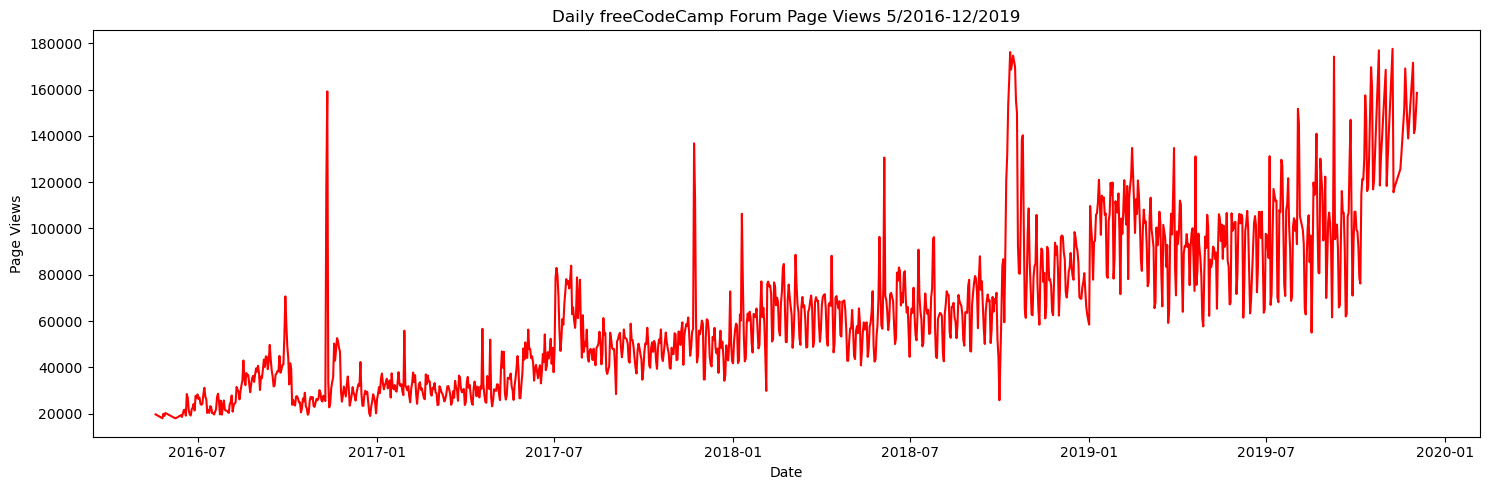

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your cleaned DataFrame
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)

# Remove outliers
low = df['value'].quantile(0.025)
high = df['value'].quantile(0.975)
df = df[(df['value'] >= low) & (df['value'] <= high)]

def draw_line_plot():
    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot(df.index, df['value'], color='red')
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    plt.tight_layout()
    plt.show()

# Then call:
draw_line_plot()


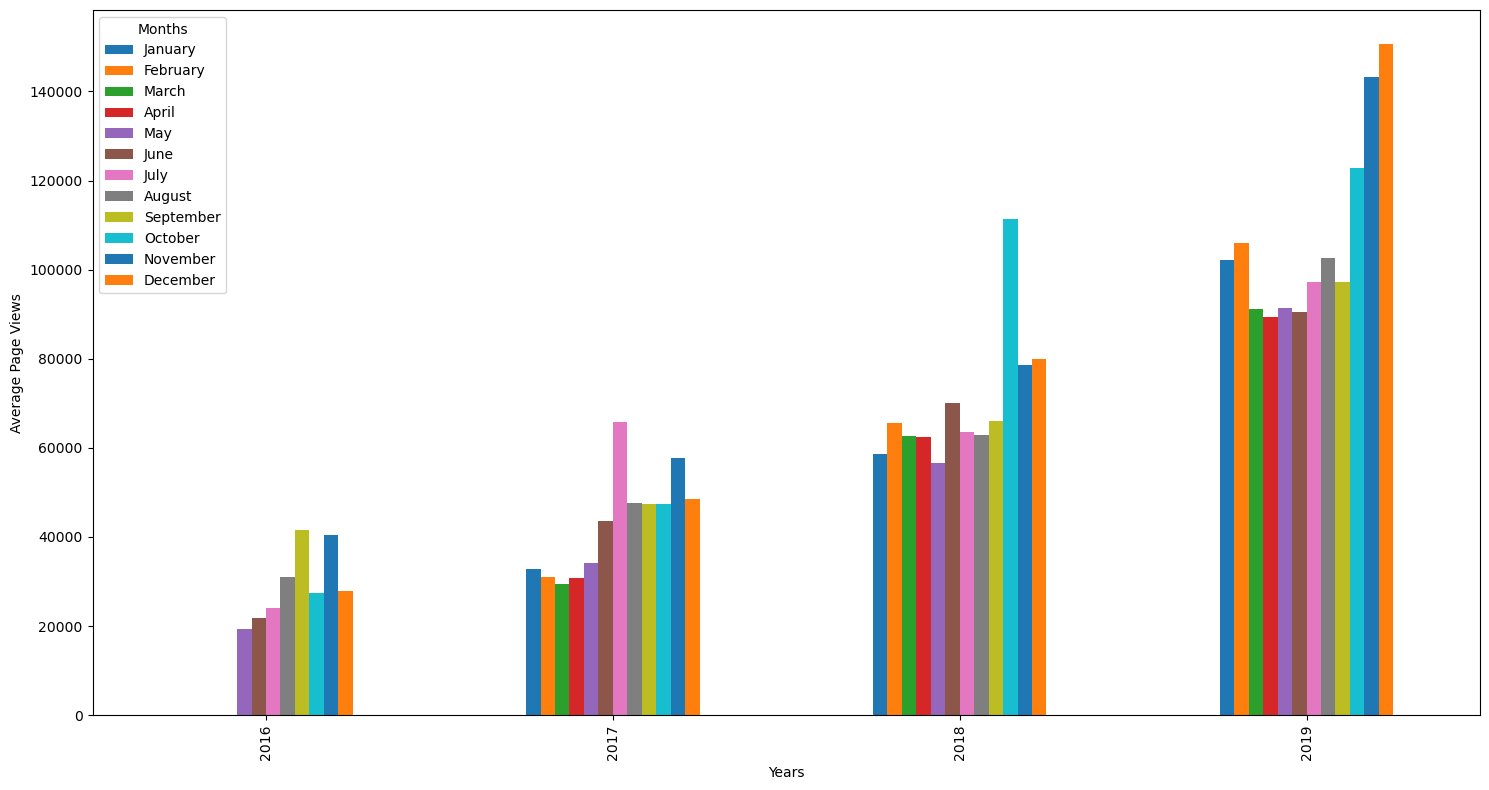

In [8]:
def draw_bar_plot():
    # Prepare data
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month_name()
    
    # Group and reshape
    bar_data = df_bar.groupby(['year', 'month'])['value'].mean().unstack()

    # Order the months properly
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    bar_data = bar_data[month_order]

    # Plot
    fig = bar_data.plot(kind='bar', figsize=(15,8)).figure
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.legend(title='Months')
    plt.tight_layout()
    plt.show()

# Call the function
draw_bar_plot()


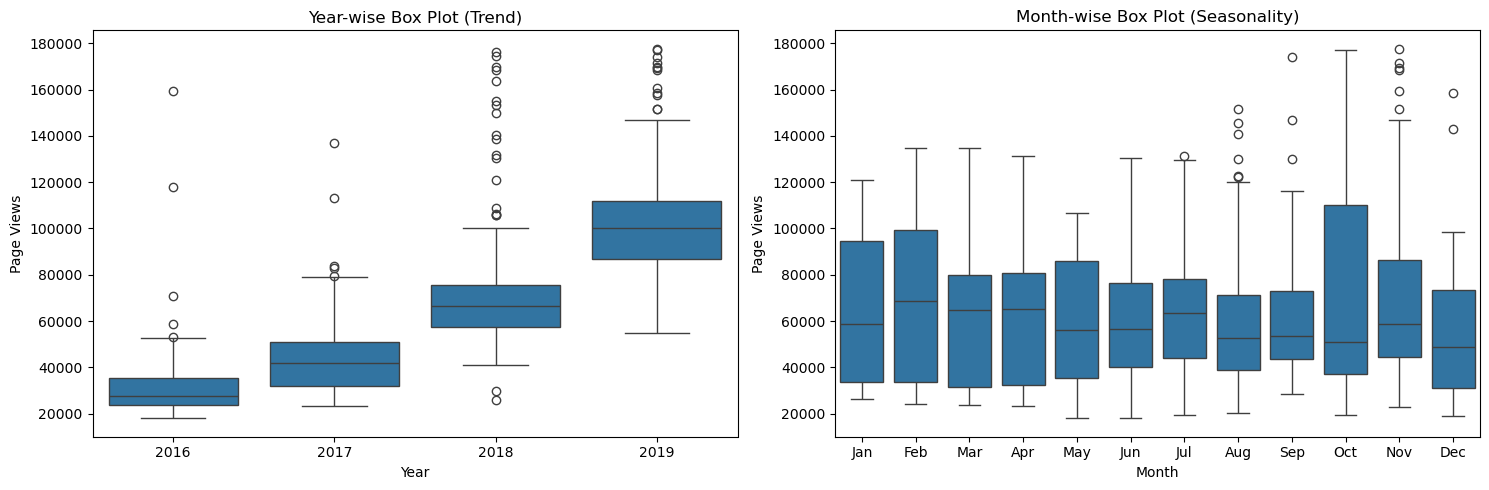

In [9]:
def draw_box_plot():
    # Prepare data
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = df_box['date'].dt.year
    df_box['month'] = df_box['date'].dt.strftime('%b')
    df_box['month_num'] = df_box['date'].dt.month

    # Sort by month number to ensure correct order
    df_box = df_box.sort_values('month_num')

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Year-wise box plot
    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    # Month-wise box plot
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    sns.boxplot(x='month', y='value', data=df_box, ax=axes[1], order=month_order)
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    plt.tight_layout()
    plt.show()

# Call the function
draw_box_plot()
